# 6.1 1차원 입력 2클래스 분류

# 6.1.1 문제 설정

1차원의 '입력 변수'를 $x_n$로 나타내고, 그 '목표 변수'를 $t_n$
$n$은 데이터의 인덱스

$t_n$은 0또는 1만을 갖는 변수
- 분류 문제의 경우 '클래스', '카테고리', '라벨'로 불림

행렬 표기법

$X = \begin{bmatrix}x_0 \\\ x_1 \\\ \vdots \\\ t_{N-1} \end{bmatrix}$,
$T = \begin{bmatrix}t_0 \\\ t_1 \\\ \vdots \\\ t_{N-1} \end{bmatrix}$

각각의 무게를 $x_n$, 각각의 성별을 $t_n$이 0이면 암컷, 1이면 수컷

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 생성 ---
np.random.seed(seed=0)  # 난수 고정
X_min = 0
X_max = 2.5
X_n = 30
X_col = ['cornflowerblue', 'gray']
X = np.zeros(X_n)       # 입력 데이터
T = np.zeros(X_n, dtype=np.uint8)       # 목표 데이터
Dist_s = [0.4, 0.8]     # 분포의 시작 지점
Dist_w = [0.8, 1.6]     # 분포의 폭
Pi = 0.5        # 클래스 0의 비율(암컷이 될 확률)
for n in range(X_n):
    wk = np.random.rand()
    T[n] = 0 * (wk < Pi) + 1 * (wk >= Pi)       # (A)
    X[n] = np.random.rand() * Dist_w[T[n]] + Dist_s[T[n]]       # (B)

# 데이터 표시 ---
print('X=' +str(np.round(X, 2)))
print('T=' +str(T))

X=[1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
T=[1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


실행 시 30개의 무게 데이터 X, 성별 T 생성

수컷과 암컷을 확률적으로 결정 암컷이 될 확률을 Pi=0.5로 하여, 무작위로 결정
True = 1, False = 0 으로 해석되므로 wk를 0 ~ 1의 난수로 정한 후, wk < Pi라면 T[n] = 0x1 + 1x0 = 0,
wk > Pi이면 T[n] = 0x0 + 1x1 = 1이 되는 구조


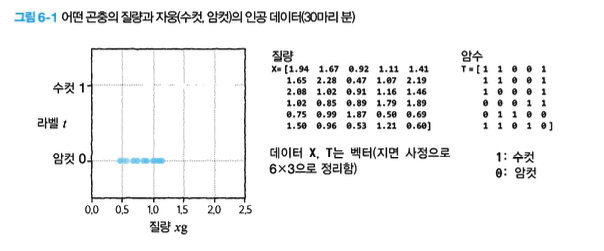

- 암컷이라면 Dist_s[0] = 0.4에서 폭 Dist_w[0] = 0.8의 균일한 분포에서 질량을 샘플링
- 수컷이라면 Dist_s[0] = 0.8에서 폭 Dist_w[0] = 1.6의 균일한 분포에서 질량을 샘플링


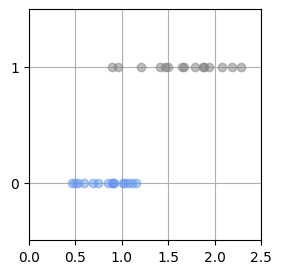

In [10]:
# 데이터 분포 표시 ---
def show_data1(x, t):
  K = np.max(t) + 1
  for k in range(K): # (A)
    plt.plot(x[t==k], t[t==k], X_col[k], alpha=0.5, linestyle='none', marker='o') #(B)
    plt.grid(True)
    plt.ylim(-.5, 1.5)
    plt.xlim(X_min, X_max)
    plt.yticks([0,1])
fig = plt.figure(figsize=(3,3))
show_data1(X, T)
plt.show()

(B)는 분포를 표시하는 코드. 이 코드는 k루프 안에 있다.

처음 k = 0의 처리는 t==0 일 때 x와 t만을 추출하여 플롯하는 명령

x[t==0]을 사용하면 t==0을 채우는 요소 번호 x가 추출되므로 편리함

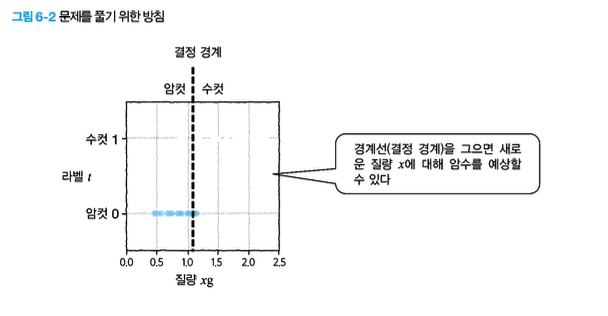

문제를 푸는 방침은 수컷과 암컷을 분리하는 경계선을 결정하는 것 -> 결정 경계 (decision boundary)

결정 경계보다 작으면 '암컷', 크면 '수컷'으로 예측

결정 경계를 정하는 법

선형 회귀 모델을 사용하기 -> 클래스를 0,1의 값으로 해석하여 데이터의 분포에 직선을 맞추는 것

확실하게 수컷으로 판정할 수 있는 데이터 점에서도 직선이 데이터에 점에 겹쳐져 있지 않기에 오차가 발생

이 오차를 해소하려는 힘이 작용해 결정 경계가 수컷쪽으로 끌려감.이 현상은 빗낙나 값이 클수록 심각해짐.

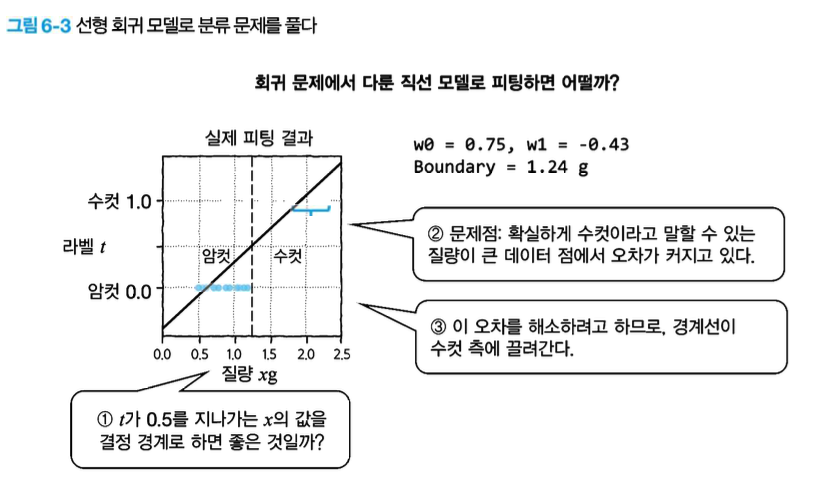

# 6.1.2 확률로 나타내는 클래스 분류

질량 $x$가 0.8g에서 1.2g사이를 예측하기 위해 모호성을 확률로 포함한 예측을 함



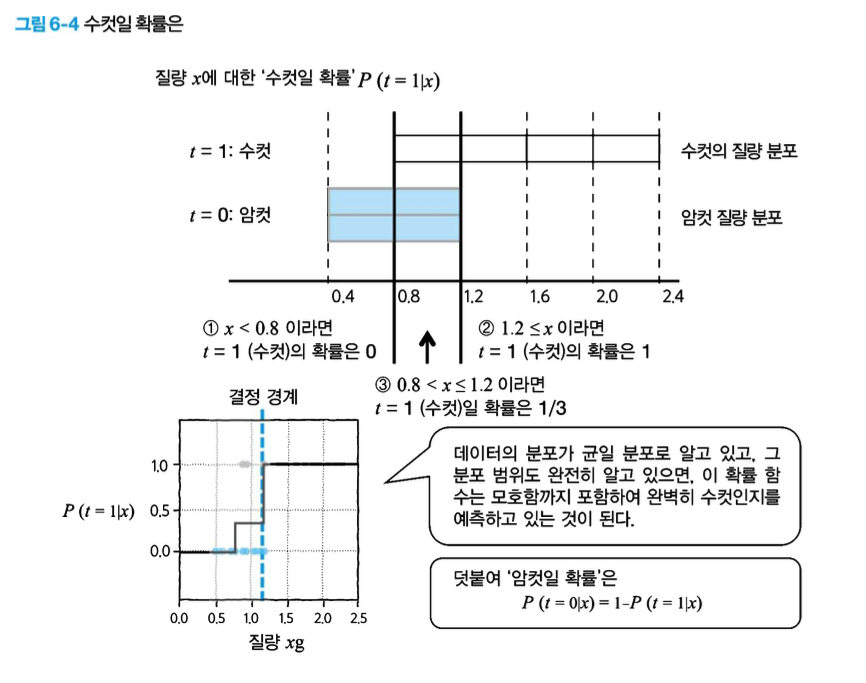

$0.8 \leq x \leq 1.2$ 에서 2(암컷의 데이터 수) = 수컷 데이터 수 -> 겹쳐진 $x$의 범위에서 무작위로 데이터를 선택하면, '수컷일 확률'은 1/3이 됨

$x < 0.8$ 일 때 수컷일 확률 = 0

$x > 1.2$ 일 때 수컷일 확률 = 1

이 같은 x에 대해 t=1(수컷)일 확률은 조건부 확률을 사용하여 다음과 같이 나타냄

$P(t=1|x)$

이 조건부 확률은 $x$의 함수로 볼 수 있음.

$P(t=1|x) = 0.5$가 되는 $x$가 결정 경계

여기서는 $x=1.2$가 결정 경계

# 6.1.3 최대가능도법

앞의 예에서는 $0.8 < x \leq 1.2$일 때,
$P(t=1|x) = \frac13$임을 실제 분포 정보에서 해석적인 방법으로 계산함. 그러나 실제 이 값은 데이터로부터 추정해야 함.

예를 들어 $x$가 $0.8 < x \leq 1.2$의 범위에 있는 $t$에 주목하여, 처음 3회는 $t=0$ 이며, 4회째는 $t=1$이었다고 한다. 이 정보에서 $0.8 < x \leq 1.2$로 $P(t=1|x)$을 추정

$P(t=1|x) = w$

확률 $w$에서 $t=1$을 생성하는 모델. $w$의 범위는 0에서 1사이

이 모델이 **T** = 0, 0, 0, 1이라는 데이터를 생성했다고 가정하여, 가장 타당한 $w$를 추정

단순히 생각해보면, 총 4회 중에서 $t=1$은 1회 밖에 없기 때문에, $w=1/4$이 될 것임. 다만 다른 모델의 경우에도 대응하기 위해 일반적인 최대가가능도법으로 사용

'모델에서 클래스 데이터 **T** = 0,0,0,1이 생성될 확률' = 가능도 (우도)

$P(t=1|x) = w$이므로 $t=1$이 될 확률은 $w$이고, $t=0$이 될 확률은 $(1-w)$

따라서 처음 3회가 $t=0$, 4회째가 $t=1$이 될 확률, 즉 가능도는

$P({T=0,0,0,1}|x) = (1-w)^3w$

아래 그래프에서 최대치를 갖는 $w$가 가장 적절한 값이자, 추정치가 됨. 이것이 최대가능도법임.

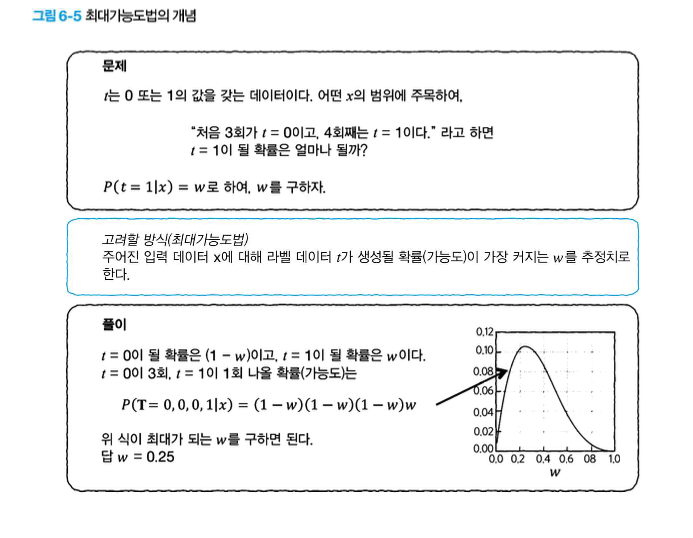

$P({T=0,0,0,1}|x) = (1-w)^3w$ 와 같이 연속된 곱셈을 다루는 것이 힘드므로 양변에 로그를 취한다.

$logP = log\{(1-w)^3w\} = 3log(1-w)+logw$

로그는 단조 증가 함수이므로 $P$를 최대로 만드는 $w$와, $logP$를 최대화 하는 $w$를 구하면, 그 $w$는 $P$도 최대로 만들 것.

로그를 취하 가능도 -> 로그 가능도, 평균 제곱 오차 함수 대신 사용되는 확률 세계의 목적 함수.

평균 제곱 오차 함수에서는 이를 최소화하는 매개 변수를 찾았지만, 로그 가능도에서는 최대화하는 매개 변수를 찾게 됨.

$\frac{\partial}{\partial w} \log P = \frac{\partial}{\partial w} [3 \log(1 - w) + \log w] = 0$

$3 \left(\frac{-1}{1 - w}\right) + \frac{1}{w} = 0$

$\frac{-3w + 1 - w}{(1 - w)w} = 0$

0 < w < 1의 범위에서 답을 생각하면 분모가 0이 되지 않기 때문에, 양변에 $(1 - w)w$를 곱하면

$-3w + 1 - w = 0$

$w = \frac{1}{4}$

# 6.1.4 로지스틱 회귀 모델
로지스틱 회귀 모델은 $y = w_0x+w_1$을 시그모이드 함수인
$\sigma(x) = \frac{1}{1+exp(-x)}$ 에 대입한 것

$\sigma(w_0+w_1) = \frac{1}{1+exp\{-(w_0x+w_1)\}}$

이렇게 하면 직선 모델의 큰 양의 출력은 1에 가까운 값이 되고, 절대값이 큰 음의 출력은 0에 가까운 값으로 변환되어 직선의 함수는 0과 1의 범위에 들어감


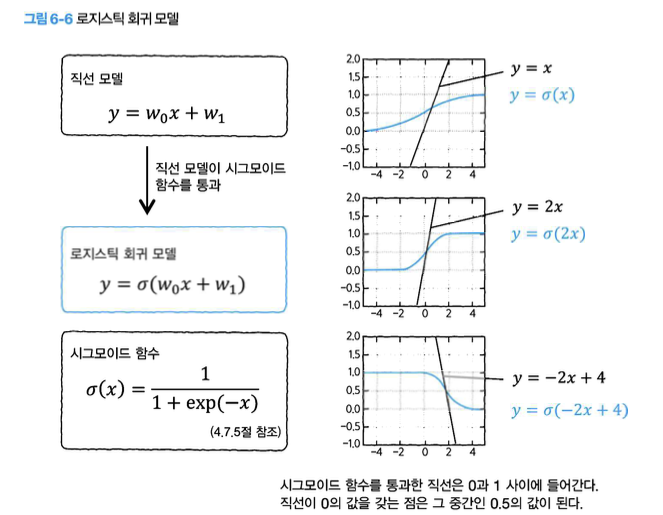

In [4]:
def logistic(x, w):
  y = 1 / (1 + np.exp(-(w[0] * x + w[1])))
  return y

In [5]:
def show_logistic(w):
  xb = np.linspace(X_min, X_max, 100)
  y = logistic(xb, w)
  plt.plot(xb, y, color='gray', linewidth=4)
  # 결정 경계
  i = np.min(np.where(y > 0.5)) # (A)
  B = (xb[i - 1] + xb[i]) / 2 # (B)
  plt.plot([B, B], [-.5, 1.5], color='k', linestyle='--')
  plt.grid(True)
  return B

1.25

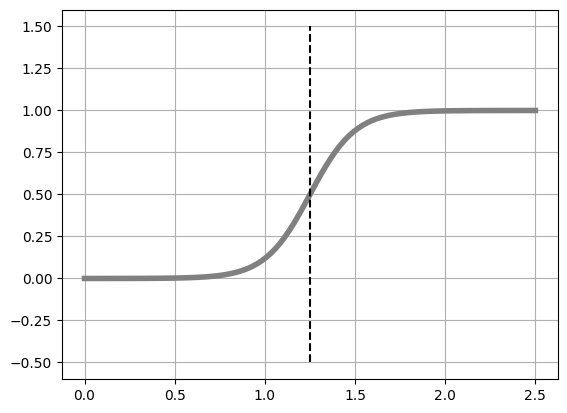

In [5]:
W = [8, -10]
show_logistic(W)

# 6.1.5 교차 엔트로피 오차
로지스틱 회귀 모델을 통해 $x$가 $t=1$이 될 확률
- $y=\sigma(w_0x + w_1)=P(t=1|x)$

매개 변수 $w_0$와 $w_1$이 곤충의 데이터에 맞도록 최대가능도법을 사용
- 이 모델에서 곤충의 데이터가 생성될 가능성이 확률적으로 가장 높은 매개 변수를 구한다



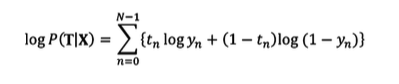

이를 교차 엔트로피 오차 cross-entropy error function라고 한다.
지금까지의 평균 제곱 오차와 마찬가지로 오차가 '최소'가 되는 매개변수를 구하면 됨
교차 엔트로피를 $N$으로 나눈 '평균 교차 엔트로피 오차'를 $E(x)$로 정의



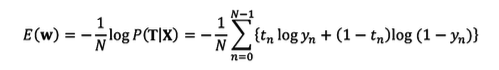

In [6]:
# 평균 교체 엔트로피 오차 ---
def cee_logistic(w, x, t):      # 평균 교차 엔트로피 오차 계산 함수
    y = logistic(x, w)
    cee = 0
    for n in range(len(y)):
        cee = cee - (t[n] * np.log(y[n]) + (1 - t[n]) * np.log(1-y[n]))
    cee = cee / X_n
    return cee

# test
W=[1,1]
cee_logistic(W, X, T)

1.0288191541851066

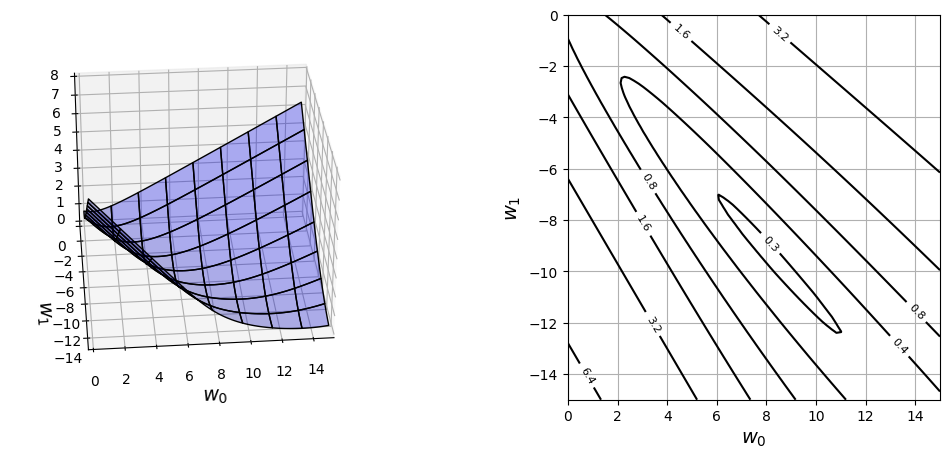

In [7]:
# 평균 교차 엔트로피 오차의 모양 확인
# 계산 ---
xn = 80     # 등고선 표시 해상도
w_range = np.array([[0, 15], [-15, 0]])
x0 = np.linspace(w_range[0,0], w_range[0,1], xn)
x1 = np.linspace(w_range[1,0], w_range[1,1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
C = np.zeros((len(x1), len(x0)))
w = np.zeros(2)
for i0 in range(xn):
    for i1 in range(xn):
        w[0] = x0[i0]
        w[1] = x1[i1]
        C[i1, i0] = cee_logistic(w, X, T)

# 표시 ---
plt.figure(figsize=(12, 5))
# plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)
ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(xx0, xx1, C, color='blue', edgecolor='black',
                rstride=10, cstride=10, alpha=0.3)
ax.set_xlabel('$w_0$', fontsize=14)
ax.set_ylabel('$w_1$', fontsize=14)
ax.set_xlim(0, 15)
ax.set_ylim(-15, 0)
ax.set_zlim(0, 8)
ax.view_init(30, -95)

plt.subplot(1, 2, 2)
cont = plt.contour(xx0, xx1, C, 20, colors='black',
                   levels=[0.26, 0.4, 0.8, 1.6, 3.2, 6.4])
cont.clabel(fmt='%1.1f', fontsize=8)
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)
plt.grid(True)
plt.show()

# 6.1.6 학습 규칙의 도출
교차 엔트로피 오차를 최소화하는 매개 변수의 분석해는 구할 수 없다. $y_n$이 비선형의 시그모이드 함수를 포함하고 있기 때문.

그래서 경사 하강법을 사용하여 수치적으로 구함

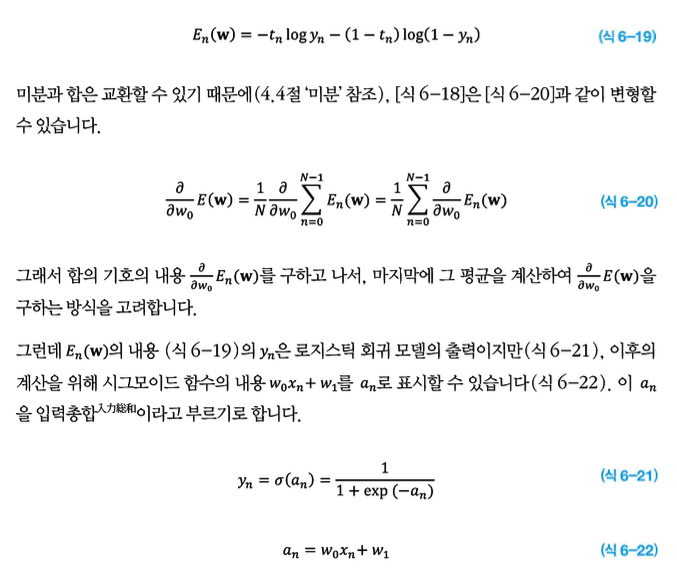

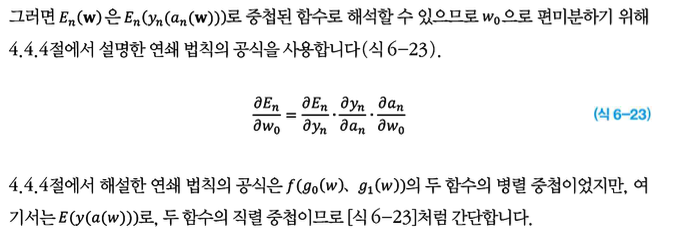

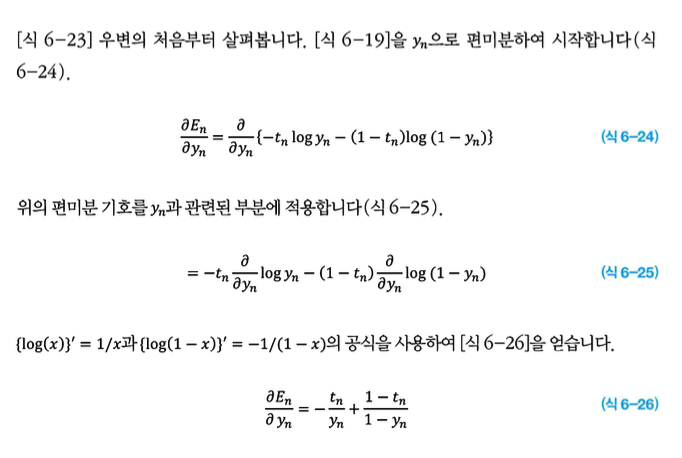

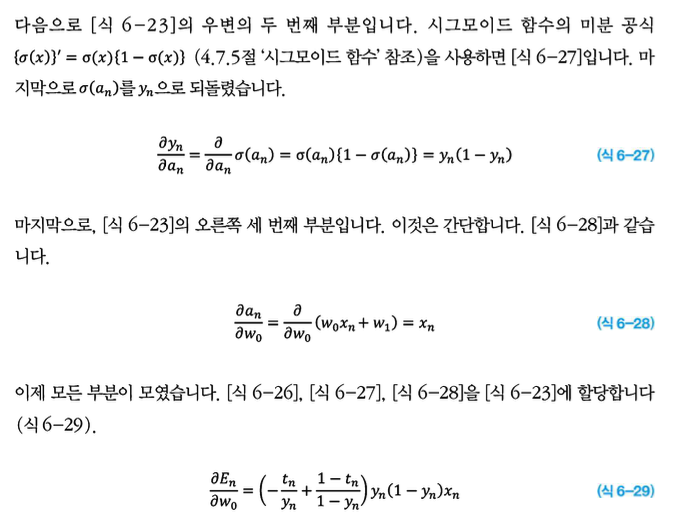

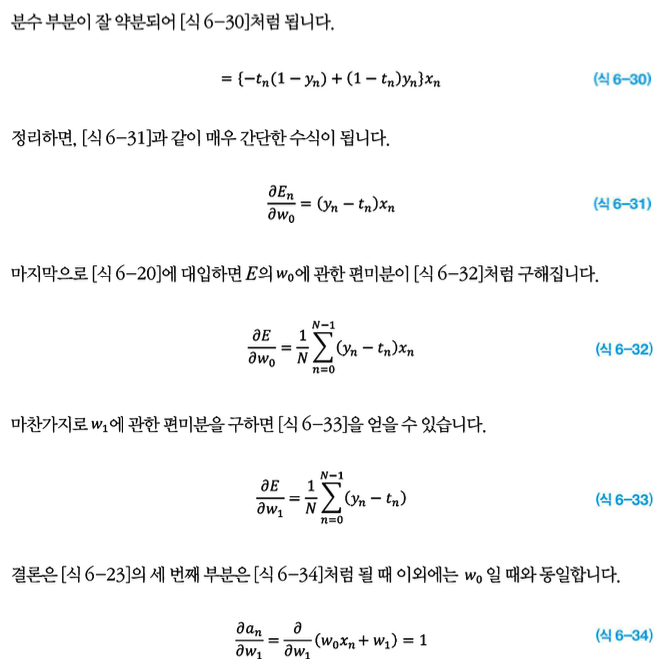

In [8]:
# 평균 교차 엔트로피 오차의 미분 ---
def dcee_logistic(w, x, t):
    y = logistic(x, w)
    dcee = np.zeros(2)
    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n] - t[n]) * x[n]
        dcee[1] = dcee[1] + (y[n] - t[n])
    dcee = dcee / X_n
    return dcee

# --- test
W = [1, 1]
dcee_logistic(W, X, T)

array([0.30857905, 0.39485474])

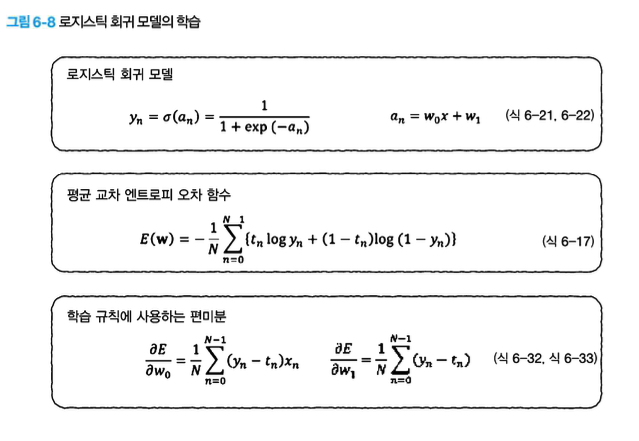

# 6.1.7 경사 하강법에 의한 해

w0 = 8.18, w1 = -9.38
CEE = 0.25
Boundary = 1.15 g


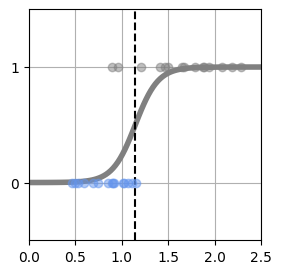

In [11]:
from scipy.optimize import minimize

def fit_logistic(w_init, x, t):
    res1 = minimize(cee_logistic, w_init, args=(x, t), jac=dcee_logistic, method="CG")  # (A)
    return res1.x

# 메인 ---
plt.figure(1, figsize=(3, 3))
W_init = [1, -1]
W = fit_logistic(W_init, X, T)
print("w0 = {0:.2f}, w1 = {1:.2f}".format(W[0], W[1]))
B = show_logistic(W)
show_data1(X, T)
plt.ylim(-0.5, 1.5)
plt.xlim(X_min, X_max)
cee = cee_logistic(W, X, T)
print("CEE = {0:.2f}".format(cee))
print("Boundary = {0:.2f} g".format(B))
plt.show()

minimize()의 인수로는 교차 엔트로피의 함수 cee_logistic
,w의 초기값 w_init,
args(x, t)에는 cee_logistic의 w 이외의 인수
jac=dcee_logistic에는 미분 함수를 지정하고 method="CG"로 켤레 기울기법 이라는 경사 하강법의 일종을 지정

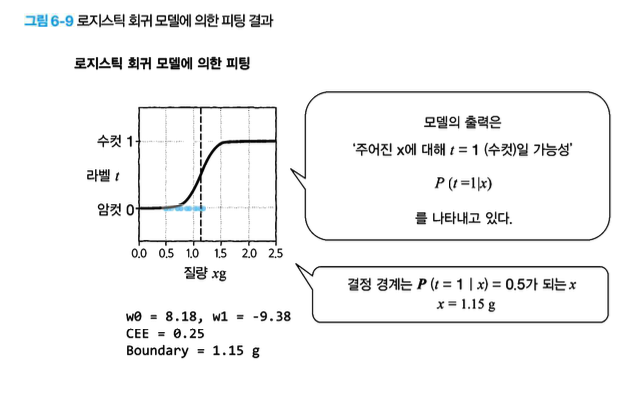

# 6.2 2차원 입력 2클래스 분류
입력 데이터가 2차원인 경우로 확장

6.2.1 문제 설정
2차원 데이터 다시 만듦

In [12]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 생성 ----------------------------------------------
np.random.seed(seed=1)  # 난수를 고정
N = 100  # 데이터의 수
K = 3  # 분포 수
T3 = np.zeros((N, 3), dtype=np.uint8)
T2 = np.zeros((N, 2), dtype=np.uint8)
X = np.zeros((N, 2))
X_range0 = [-3, 3]  # X0 범위 표시용
X_range1 = [-3, 3]  # X1 범위 표시용
Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]])  # 분포의 중심
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]])  # 분포의 분산
Pi = np.array([0.4, 0.8, 1])  # 각 분포에 대한 비율 0.4, 0.8, 1
for n in range(N):
    wk = np.random.rand()
    for k in range(K):
        if wk < Pi[k]:
            T3[n, k] = 1
            break
    for k in range(2):
        X[n, k] = (np.random.randn() * Sig[T3[n, :] == 1, k]) + Mu[T3[n, :] == 1, k]
T2[:, 0] = T3[:, 0]
T2[:, 1] = T3[:, 1] | T3[:, 2]

<ipython-input-13-458132161d5d>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X[n, k] = (np.random.randn() * Sig[T3[n, :] == 1, k]) + Mu[T3[n, :] == 1, k]


In [14]:
print(X[:5,:])

[[-0.14173827  0.86533666]
 [-0.86972023 -1.25107804]
 [-2.15442802  0.29474174]
 [ 0.75523128  0.92518889]
 [-1.10193462  0.74082534]]


In [16]:
print(T2[:5,:])

[[0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]]


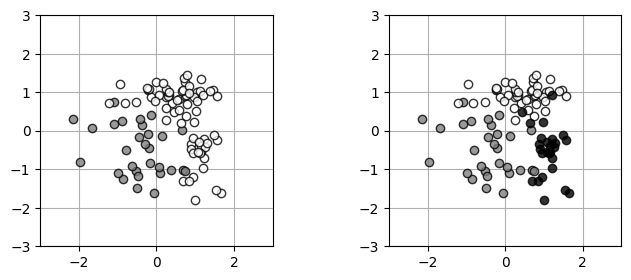

In [17]:
# 데이터 표시

def show_data2(x,t):
  wk, K = t.shape
  c = [ [.5, .5, .5], [1,1,1], [0,0,0] ]
  for k in range(K):
    plt.plot( x[t[:, k] == 1, 0], x[t[:, k] == 1,1], linestyle='none', markeredgecolor='black', marker='o', color=c[k], alpha=0.8 )
    plt.grid(True)

#메인
plt.figure(figsize=(7.5,3))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,1)
show_data2(X, T2)
plt.xlim(X_range0)
plt.ylim(X_range1)

plt.subplot(1,2,2)
show_data2(X, T3)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()

# 6.2.2 로지스틱 회귀 모델
로지스틱 회귀 모델은 2차원 입력 버전으로 확장 가능

$y = \sigma(a)$

$a = w_0x_0+w_1x_1+w_2$

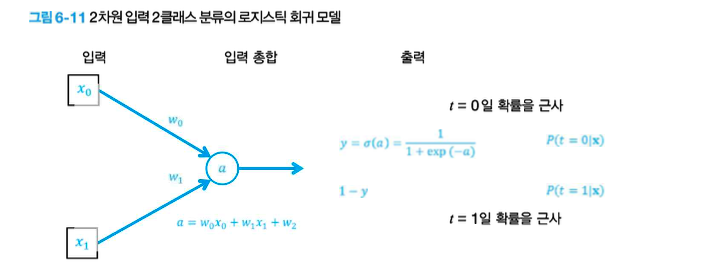

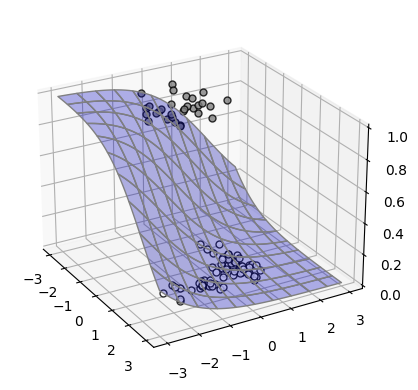

In [18]:
# 로지스틱 회귀 모델
def logistic2(x0, x1, w):
  y = 1 / (1 + np.exp(-(w[0] * x0 + w[1] * x1 + w[2])))
  return y

# 모델 3D 보기
from mpl_toolkits.mplot3d import axes3d

def show3d_logistic2(ax, w):
  xn = 50
  x0 = np.linspace(X_range0[0], X_range0[1], xn)
  x1 = np.linspace(X_range1[0], X_range1[1], xn)
  xx0, xx1 = np.meshgrid(x0, x1)
  y = logistic2(xx0, xx1, w)
  ax.plot_surface(xx0, xx1, y, color='blue', edgecolor='gray', rstride=5, cstride=5, alpha=0.3)

def show_data2_3d(ax, x, t):
  c = [ [.5, .5, .5], [1,1,1] ]
  for i in range(2):
    ax.plot( x[t[:, i] == 1, 0], x[t[:, i] == 1, 1], 1 - i, marker='o', color=c[i], markeredgecolor='black', linestyle='none', markersize=5, alpha=0.8 )
  Ax.view_init(elev=25, azim=-30)

# test
Ax = plt.subplot(1,1,1,projection='3d')
W=[-1, -1, -1]
show3d_logistic2(Ax, W)
show_data2_3d(Ax,X,T2)

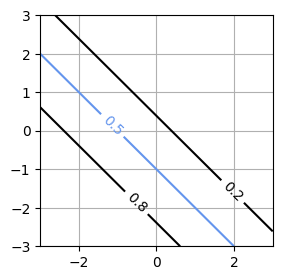

In [19]:
def show_contour_logistic2(w):
  xn = 30 # 매개 변수의 분할 수
  x0 = np.linspace(X_range0[0], X_range0[1], xn)
  x1 = np.linspace(X_range1[0], X_range1[1], xn)
  xx0, xx1 = np.meshgrid(x0, x1)
  y = logistic2(xx0, xx1, w)
  cont = plt.contour(xx0, xx1, y, levels=(0.2, 0.5, 0.8), colors=['k', 'cornflowerblue', 'k'])
  cont.clabel(fmt='%1.1f', fontsize=10)
  plt.grid(True)

#test
plt.figure(figsize=(3,3))
W = [-1, -1, -1]
show_contour_logistic2(W)

모델의 평균 교차 엔트로피 오차 함수

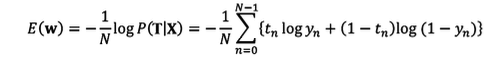

데이터베이스에는 $1-of-K$부호화를 사용하는데, 2클래스 분류 문제이므로 **T**의 0열째 $t_{n0}$을 $t_n$으로 두고,
1이면 클래스 0, 0이면 클래스 1로 처리

In [21]:
# 크로스 엔트로피 오차
def cee_logistic2(w,x,t):
  X_n = x.shape[0]
  y = logistic2( x[:, 0], x[:, 1], w )
  cee = 0
  for n in range(len(y)):
    cee = cee - ( t[n, 0] * np.log(y[n]) + ( 1 - t[n,0]) * np.log( 1 - y[n]) )
  cee = cee / X_n
  return cee

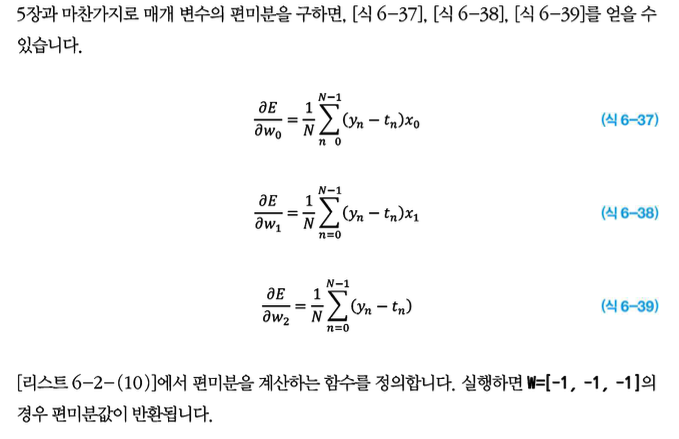

In [22]:
# 크로스 엔트로피 오차의 미분
def dcee_logistic2(w,x,t):
  X_n = x.shape[0]
  y = logistic2( x[:,0], x[:,1], w )
  dcee = np.zeros(3)
  for n in range(len(y)):
    dcee[0] = dcee[0] + ( y[n] - t[n, 0] ) * x[n, 0]
    dcee[1] = dcee[1] + ( y[n] - t[n, 0] ) * x[n, 1]
    dcee[2] = dcee[2] + ( y[n] - t[n, 0] )
  dcee = dcee / X_n
  return dcee

# test
W = [-1, -1, -1]
dcee_logistic2(W, X, T2)

array([ 0.10272008,  0.04450983, -0.06307245])

w0 = -3.70, w1 = -2.54, w2 = -0.28
CEE = 0.22


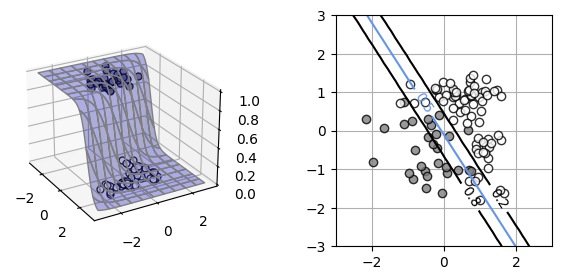

In [23]:
from scipy.optimize import minimize

# 로지스틱 회귀 모델의 매개 변수 검색
def fit_logistic2(w_init, x, t):
  res = minimize(cee_logistic2, w_init, args=(x,t), jac=dcee_logistic2, method='CG')
  return res.x

# 메인
plt.figure(1, figsize=(7,3))
plt.subplots_adjust(wspace=0.5)

Ax = plt.subplot(1,2,1,projection='3d')
W_init = [-1, 0, 0]
W = fit_logistic2(W_init, X, T2)
print("w0 = {0:.2f}, w1 = {1:.2f}, w2 = {2:.2f}".format( W[0], W[1], W[2] ))
show3d_logistic2(Ax, W)

show_data2_3d(Ax, X, T2)
cee = cee_logistic2(W, X, T2)
print("CEE = {0:.2f}".format(cee))

Ax = plt.subplot(1,2,2)
show_data2(X, T2)
show_contour_logistic2(W)

plt.show()

# 6.3 2차원 입력 3클래스 분류

# 6.3.1 3클래스 분류 로지스틱 회귀 모델
소프트맥스 함수를 모델의 출력에 사용해서 3클래스 이상의 클래스 분류에 대응

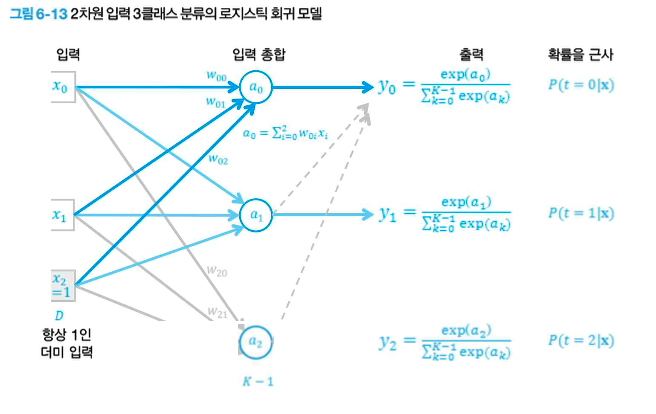

3클래스 분류 문제라면 3개의 클래스에 대응하는 입력 총합 $a_k(k=0,1,2)$를 고려함

$a_k = w_{k0}x_0+w_{k1}x_1+w_{k2}$
$(k=0,1,2)$

$w_{ki}$는 입력 $w_i$에서 클래스 $k$의 입력 총합을 조절하는 매개 변수.


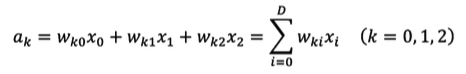

이 입력 총합을 소프트맥스 함수에 입력함

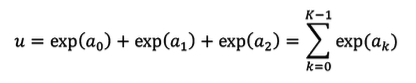

$K$는 분류할 클래스의 수
소프트맥스 함수의 출력은 $u$를 사용

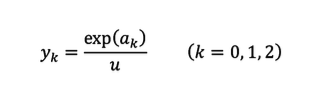

In [24]:
# 3클래스용 로지스틱 회귀 모델

def logistic3(x0, x1, w):
  K = 3
  w = w.reshape((3,3))
  n = len(x1)
  y = np.zeros((n,K))
  for k in range(K):
    y[:, k] = np.exp( w[k, 0] * x0 + w[k, 1] * x1 + w[k, 2] )
  wk = np.sum(y, axis=1)
  wk = y.T / wk
  y = wk.T
  return y

# test
W = np.array( [1,2,3,4,5,6,7,8,9] )
y = logistic3( X[:3, 0], X[:3, 1], W )
print(np.round(y,3))

[[0.    0.006 0.994]
 [0.965 0.033 0.001]
 [0.925 0.07  0.005]]


모델의 입력은 $x=[x_0,x_1,x_2]$
$x_2$는 항상 1의 더미 입력
이 입력에 대한 출력은 $y=[y_0,y_1,y_2]$로  항상 $y_0+y_1+y_2 = 1$이 보장
모델의 매개 변수는 $w_{ki}(k=0,1,2,i=0,1,2)$로, 행렬로 나타내면 다음과 같음

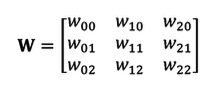

In [25]:
# 3클래스용 로지스틱 회귀 모델
def logistic3(x0, x1, w):
  K = 3
  w = w.reshape((3,3))
  n = len(x1)
  y = np.zeros((n,K))
  for k in range(K):
    y[:, k] = np.exp( w[k, 0] * x0 + w[k, 1] * x1 + w[k, 2] )
  wk = np.sum(y, axis=1)
  wk = y.T / wk
  y = wk.T
  return y

# test
W = np.array( [1,2,3,4,5,6,7,8,9] )
y = logistic3( X[:3, 0], X[:3, 1], W )
print(np.round(y,3))

[[0.    0.006 0.994]
 [0.965 0.033 0.001]
 [0.925 0.07  0.005]]


# 6.3.2 교차 엔트로피 오차
가능도는 모든 입력 데이터 **X**에 대해서 전체 클래스
데이터 **T**가 생성된 확률

한 입력 데이터 $x$에 주목하여 그 클래스가 $T = [1, 0, 0]$인 경우, 그 클래스가 생성된 확률은 아래와 같다.

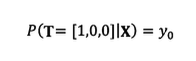

클래스 1(**T**=[0,1,0])인 경우

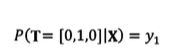

위 식을 어떤 클래스에서도 동일한 수식으로 표현하려면

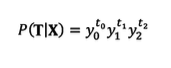

모든 $N$개의 데이터가 생성된 확률은, 이 확률을 모든 데이터에 곱하면 됨 아래와 같음

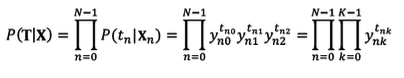

평균 교차 엔트로피 오차 함수는 가능도의 음의 대수의 평균

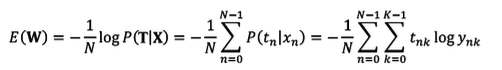

In [26]:
# 교차 엔트로피 오차

def cee_logistic3(w,x,t):
  X_n = x.shape[0]
  y = logistic3( x[:, 0], x[:, 1], w )
  cee = 0
  N, K = y.shape

  for n in range(N):
    for k in range(K):
      cee = cee - ( t[n, k] * np.log(y[n, k]) )
  cee = cee / X_n
  return cee

# test
W = np.array([1,2,3,4,5,6,7,8,9])
cee_logistic3(W,X,T3)

3.9824582404787288

# 6.3.3 경사 하강법에 의한 해

경사 하강법으로 E(**W**)를 최소화하는 **W**를 구하기위해
$w_{ki}$에 관한 편미분을 진행

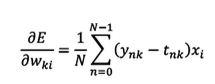

In [27]:
# 교차 엔트로피 오차의 미분

def dcee_logistic3(w,x,t):
  X_n = x.shape[0]
  y = logistic3( x[:, 0], x[:, 1], w )
  dcee = np.zeros((3,3)) #(클래스의 수 K) * (x의 차원 D+1)
  N, K = y.shape

  for n in range(N):
    for k in range(K):
      dcee[k, :] = dcee[k, :] - ( t[n,k] - y[n,k] ) * np.r_[ x[n, :], 1 ]
  dcee = dcee / X_n
  return dcee.reshape(-1)

# test
W = np.array([1,2,3,4,5,6,7,8,9])
dcee_logistic3(W,X,T3)

array([ 0.03778433,  0.03708109, -0.1841851 , -0.21235188, -0.44408101,
       -0.38340835,  0.17456754,  0.40699992,  0.56759346])

In [28]:
# 매개 변수 검색
def fit_logistic3(w_init, x,t):
  res = minimize(cee_logistic3, w_init, args=(x,t), jac=dcee_logistic3, method="CG")
  return res.x

In [29]:
# 모델 등고선 2D 표시

def show_contour_logistic3(w):
  xn = 30 #매개 변수의 분할 수
  x0 = np.linspace(  X_range0[0], X_range0[1], xn )
  x1 = np.linspace(  X_range1[0], X_range1[1], xn )

  xx0, xx1 = np.meshgrid(x0, x1)
  y = np.zeros( (xn, xn, 3) )
  for i in range(xn):
    wk = logistic3(xx0[:, i], xx1[:, i], w)
    for j in range(3):
      y[:, i, j] = wk[:, j]
  for j in range(3):
    cont = plt.contour(xx0, xx1, y[:, :, j], levels=(0.5, 0.9), colors=['cornflowerblue', 'k'])
    cont.clabel(fmt='%1.1f', fontsize=9)
  plt.grid(True)

[[-3.2  -2.69  2.25]
 [-0.49  4.8  -0.69]
 [ 3.68 -2.11 -1.56]]
CEE = 0.23


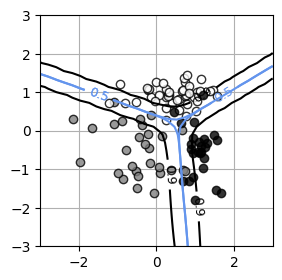

In [30]:
# 메인
W_init = np.zeros((3,3)).reshape(-1)
W = fit_logistic3(W_init, X, T3)
print( np.round( W.reshape((3,3)), 2) )
cee = cee_logistic3(W, X, T3)
print("CEE = {0:.2f}".format(cee))

plt.figure(figsize=(3,3))
show_data2(X, T3)
show_contour_logistic3(W)
plt.show()